# linear Regression for KC house pricing 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kc_house_data.csv")
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
df[df['sqft_above'].isna()]
median=df['sqft_above'].median()
df['sqft_above']=df['sqft_above'].fillna(value=median)
df['sqft_above'].isna().sum()

0

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df['sqft_above'].isna().sum()

0

In [6]:
#Removing unnecesaary columns beacause they cannot be used for prediction
col=['id','date']
df=df.drop(col,axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
#since we are going to predict price we will be dropping price column also
x=df.drop(['price'],axis=1)
y=df[['price']]

In [8]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [9]:
#splitting with 80% training dataset  and 20%test dataset
#calcuating time
import time
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=19)
#x has dataframe with 18 columns 
#y has only price column
regression=LinearRegression()
start_time=time.time()
model=regression.fit(x_train,y_train)
end_time=time.time()
print(" %s Time taken" % (end_time-start_time))
#predicting y
y_predict= regression.predict(x_test)
type(y_predict)

 0.030560016632080078 Time taken


numpy.ndarray

In [10]:
# Printing Train and Test scores
# what are these scores?
print("Train Score", regression.score(x_train,y_train))
print("Test_score",regression.score(x_test,y_test))

Train Score 0.6991546140590014
Test_score 0.7008096389184504


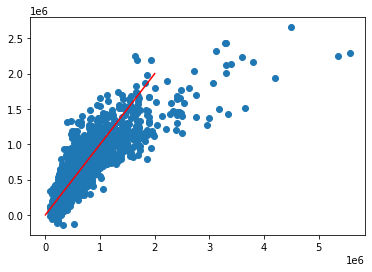

[[-3.35224620e+04  4.06922055e+04 -4.63536436e+02  1.58332527e-01
   6.52055446e+03  6.06416049e+05  5.39924034e+04  2.76690316e+04
   9.62080941e+04  6.39172727e+02  6.03544810e+02 -2.59828409e+03
   1.95525870e+01 -5.89256770e+02  6.03144613e+05 -2.18118064e+05
   2.16234445e+01 -3.65062931e-01]]


In [11]:
#cols=['red','black']
plt.scatter(y_test,y_predict)
plt.plot(range(2000000),range(2000000),color='red')
plt.show()
print(regression.coef_)
#The coef_ gives the coefficient of the features of your dataset.
#The coef_ contain the coefficients for the prediction of each of the targets. 

In [12]:
import statsmodels.api as sm
t1=time.time()
x2=sm.add_constant(x)
est=sm.OLS(y,x2)
est2=est.fit()
t2=time.time()
#print(t1-t2)
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2796.
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:12   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.73e+06   2.93e+06      2.296

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
from regressors import stats
ols=linear_model.LinearRegression()
ols.fit(x,y)
stats.coef_pval(ols,x,y)

ModuleNotFoundError: No module named 'regressors'

In [ ]:
# Finding MSE ,RMSE, R_squared values
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_predict)
print("MSE",mse)
r2=r2_score(y_test,y_predict)
print("R2",r2)


In [ ]:
from math import sqrt
rms=sqrt(mse)
rms